In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os

In [2]:
folder_list = sorted(os.walk("./result").__next__()[1])

lst_A = folder_list[2:6]
lst_B = folder_list[6:10]
lst_C = folder_list[10:14]

print(lst_A, lst_B, lst_C)

['144', '160', '176', '192'] ['208', '224', '240', '256'] ['272', '288', '304', '320']


In [3]:
def merge(lst):
    merged_gt = []
    merged_seg = []
    
    for folder in lst:
        gt_list = sorted(glob.glob('./result/' + folder + '/GT*.jpg'))
        seg_list = sorted(glob.glob('./result/' + folder + '/SEG*.jpg'))
        
        merged_gt += gt_list
        merged_seg += seg_list
    
    return merged_gt, merged_seg

In [4]:
merged_A_gt, merged_A_seg = merge(lst_A)
merged_B_gt, merged_B_seg = merge(lst_B)
merged_C_gt, merged_C_seg = merge(lst_C)

print(len(merged_C_gt))

8016


In [5]:
def DSC_list(gt_list, seg_list):
    
    DSC_list = []
    GT_sum = []
    
    for i in range(len(gt_list)):
        
        GT = cv2.imread(gt_list[i], 0) / 255

        GT[GT > 0.5] = 1
        GT[GT <= 0.5] = 0

        AUTO = cv2.imread(seg_list[i], 0) / 255

        AUTO[AUTO > 0.5] = 1
        AUTO[AUTO <= 0.5] = 0

        A_Intersect_G = np.multiply(AUTO, GT)
                
        DSC = (2 * np.sum(A_Intersect_G)) / (np.sum(AUTO) + np.sum(GT))

        DSC_list.append(DSC)
        GT_sum.append(np.sum(GT))
      
    return DSC_list


In [6]:
DSC_list_A = DSC_list(merged_A_gt, merged_A_seg)
DSC_list_B = DSC_list(merged_B_gt, merged_B_seg)
DSC_list_C = DSC_list(merged_C_gt, merged_C_seg)


## Group Comparison

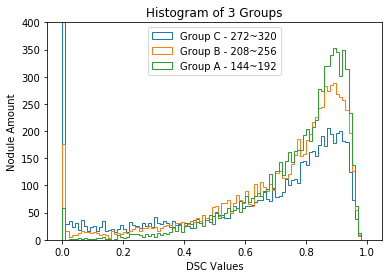

In [7]:
bins = np.arange(0,1+0.01,0.01)

plt.hist(DSC_list_C, bins, label='Group C - 272~320', histtype='step')
plt.hist(DSC_list_B, bins, label='Group B - 208~256', histtype='step')
plt.hist(DSC_list_A, bins, label='Group A - 144~192', histtype='step')

plt.xlabel('DSC Values')
plt.ylabel('Nodule Amount')
plt.title('Histogram of 3 Groups')
plt.ylim(0,400)
plt.legend(loc='upper center')
plt.savefig('DSC_Groups', dpi=300)

## Comparison among Groups

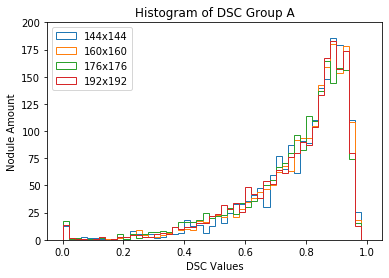

In [8]:
# Group A
bins = np.arange(0,1+0.02,0.02)
i = 2004

plt.hist(DSC_list_A[0:i], bins, label= '144x144', histtype='step', )
plt.hist(DSC_list_A[i:2*i], bins, label= '160x160', histtype='step')
plt.hist(DSC_list_A[2*i:3*i], bins, label= '176x176', histtype='step')
plt.hist(DSC_list_A[3*i:4*i], bins, label= '192x192', histtype='step')

plt.xlabel('DSC Values')
plt.ylabel('Nodule Amount')
plt.title('Histogram of DSC Group A')
plt.ylim(0,200)
plt.legend(loc='upper left')
plt.savefig('DSC_Group_A', dpi=300)

In [9]:
i = 2004
print(np.mean(DSC_list_A[0:i]), np.mean(DSC_list_A[i:2*i]), 
      np.mean(DSC_list_A[2*i:3*i]), np.mean(DSC_list_A[3*i:4*i]))
      

0.7765056483342085 0.7745045478065284 0.7588804297251283 0.7666440956675864
